In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv("data_gabung.csv")

In [45]:
df

,Unnamed: 0,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,5015,TR69555,221,2022-08-01,P4,12000,3,36000,4,23,1,Single,7.50,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5016,5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,7.22,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5017,5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,28.23,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5018,5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,5.40,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [46]:


# Create a new DataFrame for clustering (groupby by customerID and aggregate attributes)
df_agg = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()


df_agg

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [47]:
data=df_agg.drop(['CustomerID'], axis=1)

In [48]:
data

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600
...,...,...,...
442,16,59,485100
443,18,62,577700
444,18,68,587200
445,11,42,423300


In [49]:
# Normalize the data if needed
df_cluster = (data - data.mean()) / data.std()


In [50]:
df_cluster

,TransactionID,Qty,TotalAmount
0,1.777824,1.494852,2.092424
1,0.545273,1.259681,0.239001
2,1.161548,1.181291,0.671466
3,-0.379140,0.397388,-0.481507
4,-1.303553,-1.092028,-0.753503
...,...,...,...
442,1.469686,1.416462,0.983579
443,2.085961,1.651633,1.726553
444,2.085961,2.121975,1.802776
445,-0.071003,0.083827,0.487729


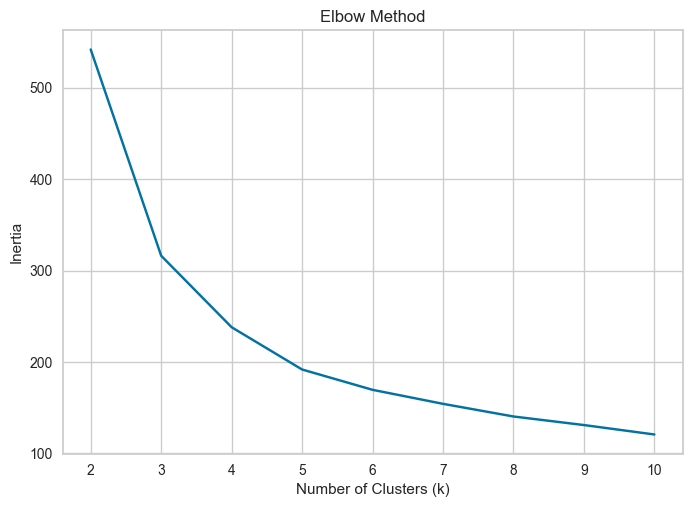

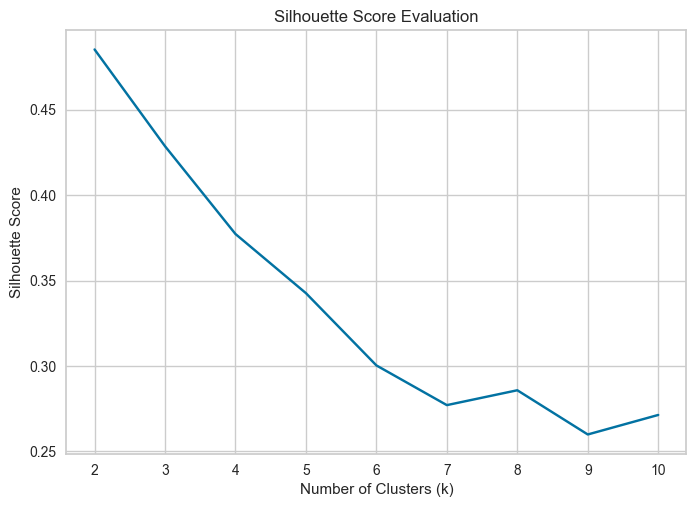

In [51]:
# evaluasi menggunakan Elbow Method dan Silhouette Score
inertias = []
silhouette_scores = []
k_values = range(2, 11)  # Ganti range
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_cluster, kmeans.labels_))

# Grafik Elbow Method
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# gtrafik Silhouette Scores
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Evaluation')
plt.show()

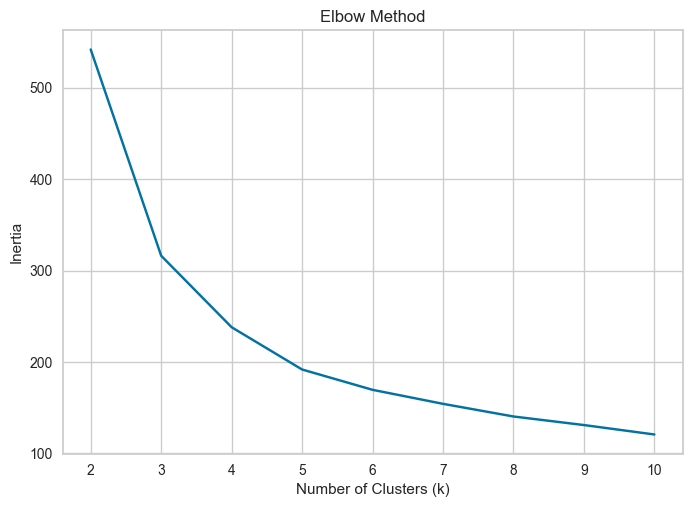

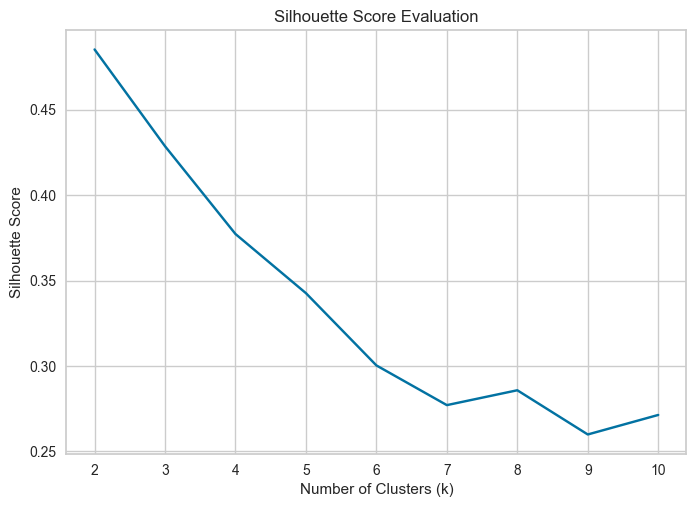

In [52]:
# evaluasi menggunakan Elbow Method dan Silhouette Score
inertias = []
silhouette_scores = []
k_values = range(2, 11)  # Ganti range
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_cluster, kmeans.labels_))

# Grafik Elbow Method
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# gtrafik Silhouette Scores
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Evaluation')
plt.show()

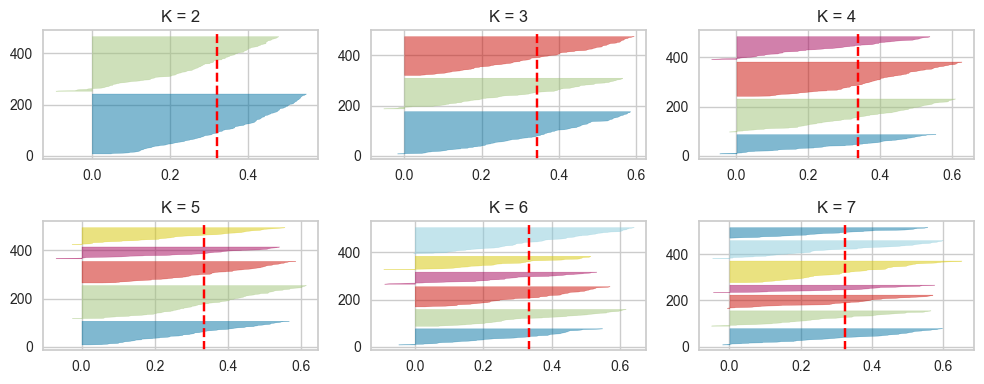

In [83]:
# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 4))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    
    # Set jumlah cluster
    n_clusters = i + 2
    
    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
    
    # Fit visualizer ke data x
    visualizer.fit(df_cluster)
    
    # Set title
    ax.set_title(f'K = {n_clusters}')
    
# Adjust layout
plt.tight_layout()
plt.show()

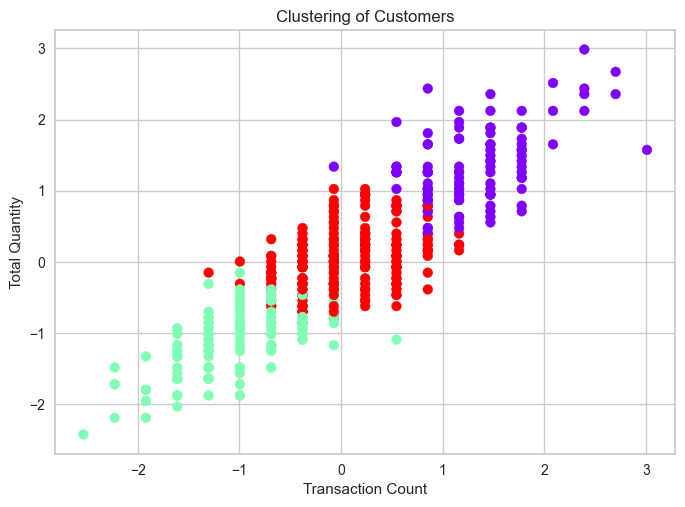

In [54]:
# Apply KMeans clustering
num_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# Visualize the clusters
plt.scatter(df_cluster['TransactionID'], df_cluster['Qty'], c=df_cluster['Cluster'], cmap='rainbow')
plt.xlabel('Transaction Count')
plt.ylabel('Total Quantity')
plt.title('Clustering of Customers')
plt.show()


In [55]:
df_hasil=df_agg.copy()

In [59]:
df_hasil['Cluster'] = df_cluster['Cluster']

In [60]:
df_hasil

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,0
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,2
4,5,7,27,268600,1
...,...,...,...,...,...
442,443,16,59,485100,0
443,444,18,62,577700,0
444,445,18,68,587200,0
445,446,11,42,423300,2


In [61]:
Rata2 = df_hasil.groupby('Cluster').agg({
    'CustomerID':'count',
    'TransactionID': 'mean',
    'Qty': 'mean',
    'TotalAmount': 'mean'
    
}).reset_index()

In [62]:
Rata2

,Cluster,CustomerID,TransactionID,Qty,TotalAmount
0,0,110,15.363636,57.636364,524504.545455
1,1,135,7.785185,26.933333,229388.888889
2,2,202,11.282178,41.188119,363267.326733


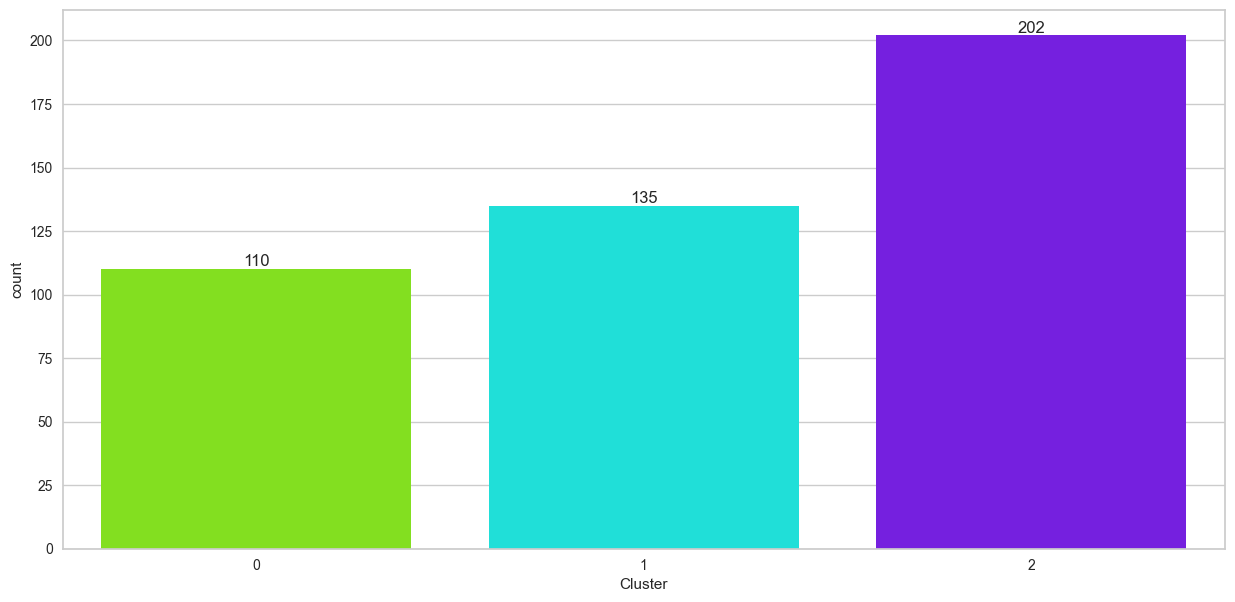

In [63]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df_hasil['Cluster'], palette='hsv')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

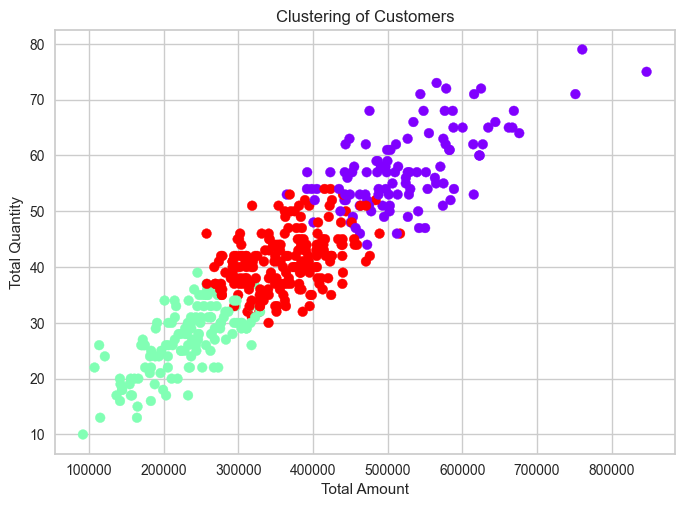

In [64]:
plt.scatter(df_hasil['TotalAmount'], df_hasil['Qty'], c=df_hasil['Cluster'], cmap='rainbow')
plt.xlabel('Total Amount')
plt.ylabel('Total Quantity')
plt.title('Clustering of Customers')
plt.show()

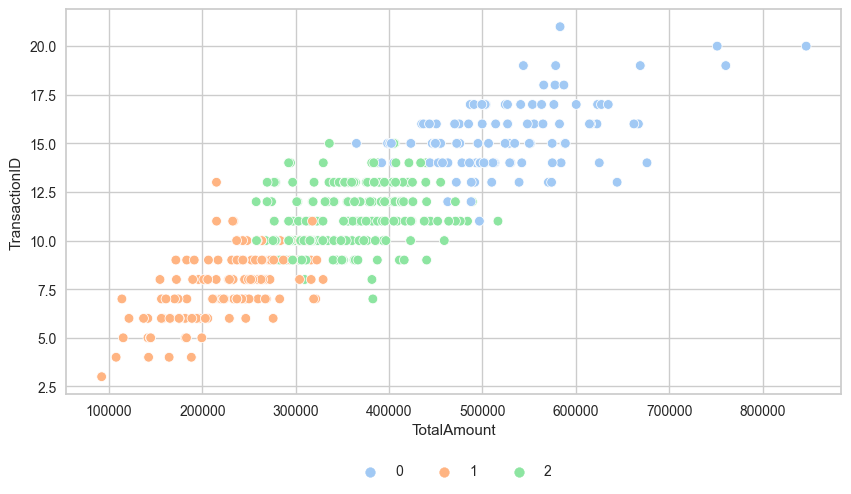

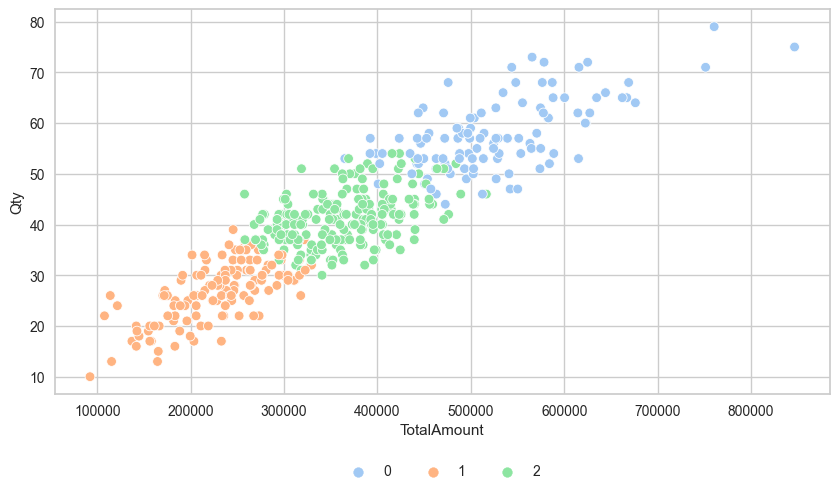

In [65]:
cols=['TransactionID',	'Qty']

for col in cols:
  fig, ax = plt.subplots(figsize=(10,5))
  sns.scatterplot(data=df_hasil, y=col, x='TotalAmount', hue="Cluster", legend='full', palette='pastel')
  plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)
  plt.show()

## Coba coba

In [66]:
df_coba=df_agg.copy()

In [67]:
df_coba

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [68]:
aqavg = df_coba['TotalAmount']/df_coba['Qty']
qtavg = df_coba['Qty']/df_coba['TransactionID']
atavg = df_coba['TotalAmount']/df_coba['TransactionID']

In [69]:
df_coba["aqavg"]=aqavg
df_coba["qtavg"]=qtavg
df_coba["atavg"]=atavg


In [70]:
df_coba



,CustomerID,TransactionID,Qty,TotalAmount,aqavg,qtavg,atavg
0,1,17,60,623300,10388.333333,3.529412,36664.705882
1,2,13,57,392300,6882.456140,4.384615,30176.923077
2,3,15,56,446200,7967.857143,3.733333,29746.666667
3,4,10,46,302500,6576.086957,4.600000,30250.000000
4,5,7,27,268600,9948.148148,3.857143,38371.428571
...,...,...,...,...,...,...,...
442,443,16,59,485100,8222.033898,3.687500,30318.750000
443,444,18,62,577700,9317.741935,3.444444,32094.444444
444,445,18,68,587200,8635.294118,3.777778,32622.222222
445,446,11,42,423300,10078.571429,3.818182,38481.818182


In [71]:
df_coba=df_coba.drop(['CustomerID','TransactionID','Qty','TotalAmount'], axis=1)

In [72]:
df_coba

,aqavg,qtavg,atavg
0,10388.333333,3.529412,36664.705882
1,6882.456140,4.384615,30176.923077
2,7967.857143,3.733333,29746.666667
3,6576.086957,4.600000,30250.000000
4,9948.148148,3.857143,38371.428571
...,...,...,...
442,8222.033898,3.687500,30318.750000
443,9317.741935,3.444444,32094.444444
444,8635.294118,3.777778,32622.222222
445,10078.571429,3.818182,38481.818182


In [73]:
df_cluster = (df_coba - df_coba.mean()) / df_coba.std()

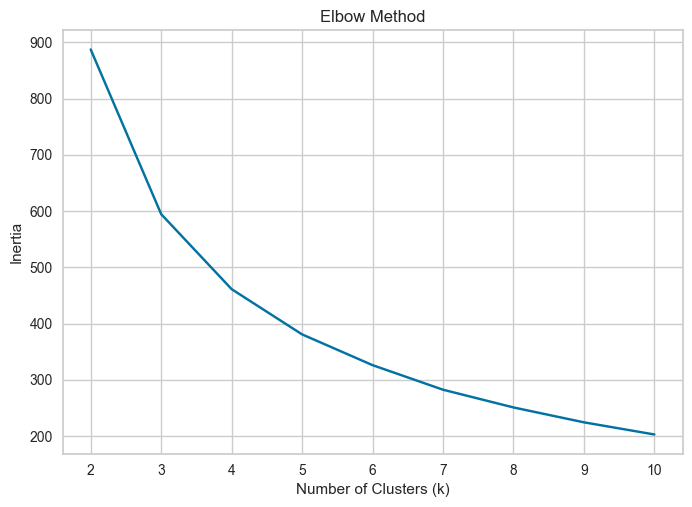

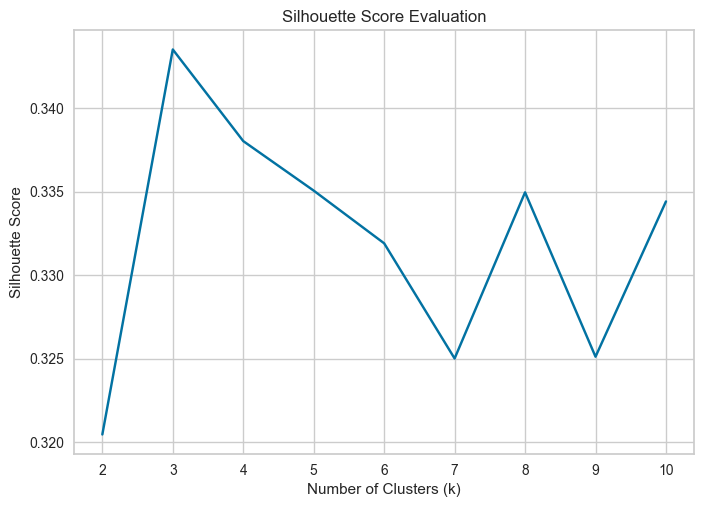

In [74]:
# evaluasi menggunakan Elbow Method dan Silhouette Score
inertias = []
silhouette_scores = []
k_values = range(2, 11)  # Ganti range
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_cluster, kmeans.labels_))

# Grafik Elbow Method
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# gtrafik Silhouette Scores
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Evaluation')
plt.show()

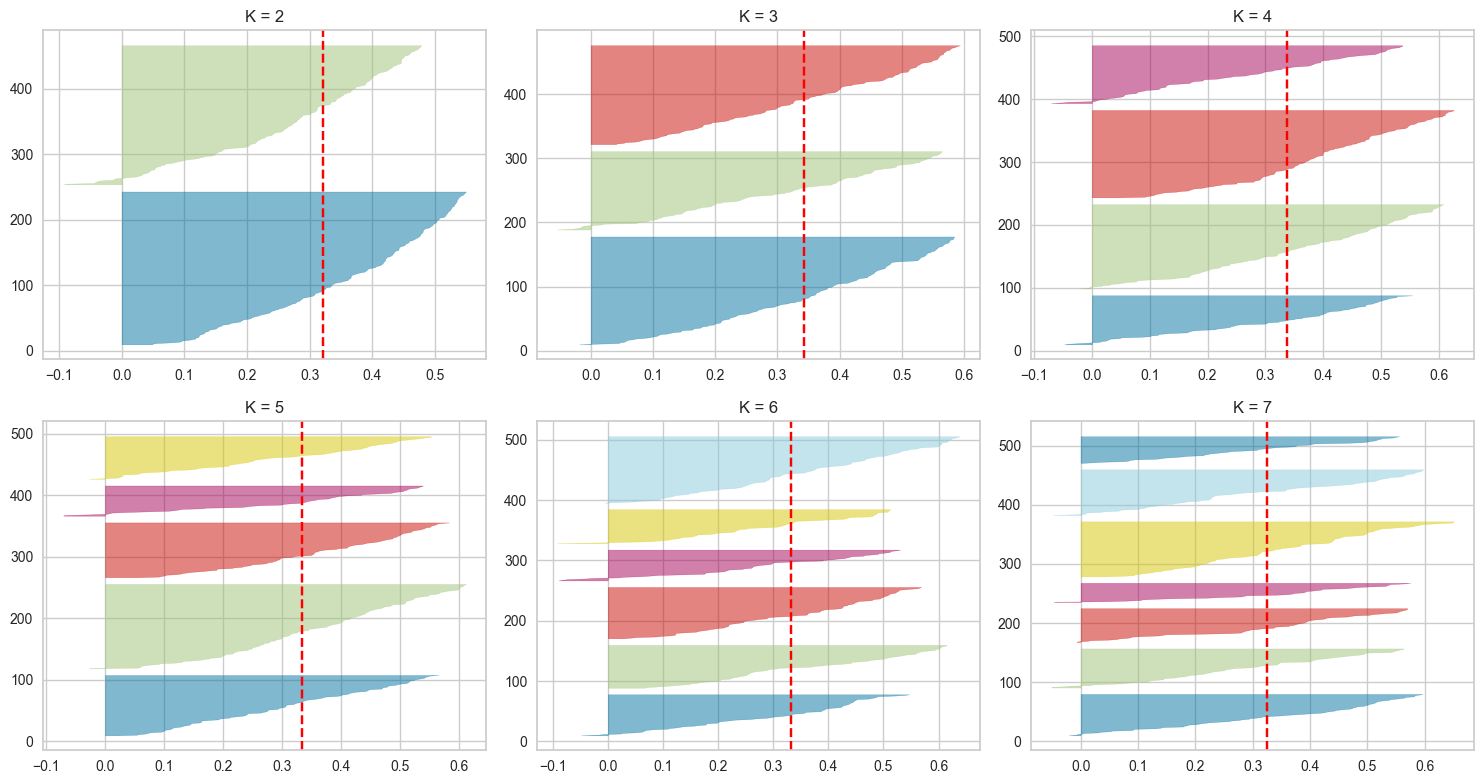

In [75]:
# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    
    # Set jumlah cluster
    n_clusters = i + 2
    
    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
    
    # Fit visualizer ke data x
    visualizer.fit(df_cluster)
    
    # Set title
    ax.set_title(f'K = {n_clusters}')
    
# Adjust layout
plt.tight_layout()
plt.show()

In [76]:
# Apply KMeans clustering
num_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
Cluster = kmeans.fit_predict(df_cluster)



In [77]:
df_coba['Cluster'] = Cluster 

aqavg	qtavg	atavg

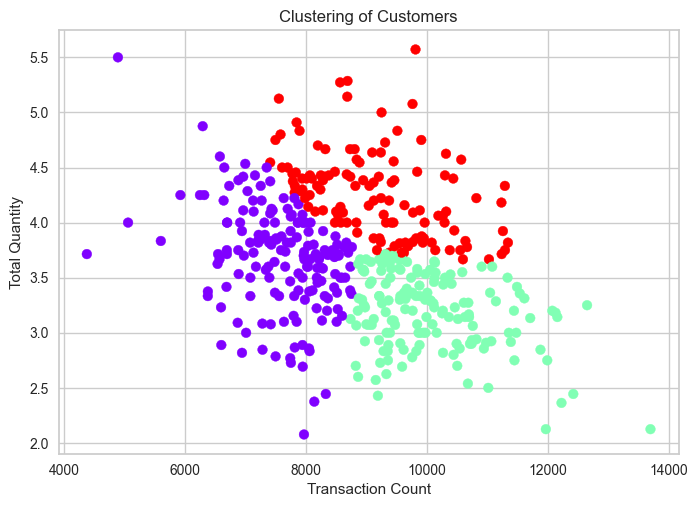

In [78]:

# Visualize the clusters
plt.scatter(df_coba['aqavg'], df_coba['qtavg'], c=df_coba['Cluster'], cmap='rainbow')
plt.xlabel('Transaction Count')
plt.ylabel('Total Quantity')
plt.title('Clustering of Customers')
plt.show()


In [79]:

df_hasil['Cluster'] = df_coba['Cluster']
df_hasil
Rata2 = df_hasil.groupby('Cluster').agg({
    'CustomerID':'count',
    'TransactionID': 'mean',
    'Qty': 'mean',
    'TotalAmount': 'mean'
    
}).reset_index()



In [80]:
Rata2



,Cluster,CustomerID,TransactionID,Qty,TotalAmount
0,0,170,11.070588,40.464706,308677.058824
1,1,155,11.606452,37.232258,371805.161290
2,2,122,10.975410,46.278689,425722.131148


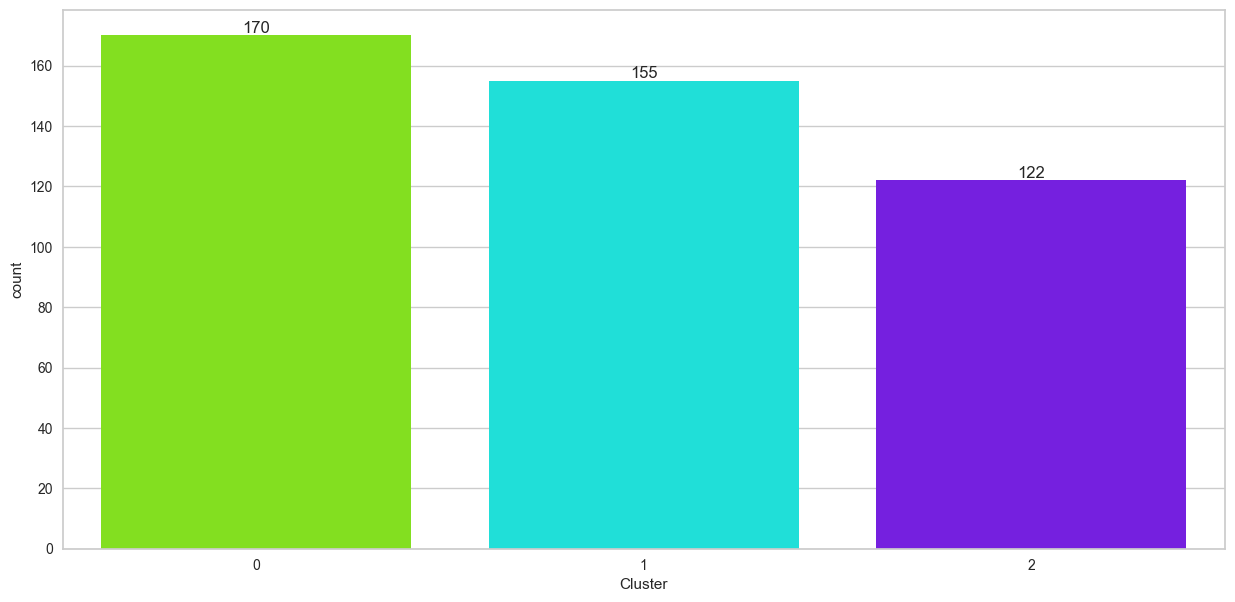

In [81]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df_hasil['Cluster'], palette='hsv')
for label in ax.containers:
    ax.bar_label(label)
plt.show()
